In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [145]:
# Muat data
data = pd.read_excel('Stunting Dataset.xlsx')
print(data.head(10))
data.info()

  Sex  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0   F   56           2.9            50         11.0         90.0   
1   F   20           3.3            49         11.1         80.5   
2   M    4           2.8            48          6.5         63.0   
3   F   14           2.0            49          7.0         71.0   
4   M   32           3.2            49         11.0         88.7   
5   M   30           2.3            50         12.0         90.0   
6   M    2           2.9            49          8.5         74.2   
7   M   33           2.5            49         10.0         91.5   
8   M   33           3.0            50         15.0         96.0   
9   F   15           4.0            51          5.9         58.3   

  ASI Eksklusif Stunting  
0           Yes       No  
1            No       No  
2            No       No  
3           Yes       No  
4           Yes       No  
5           Yes       No  
6           Yes       No  
7            No      Yes  
8       

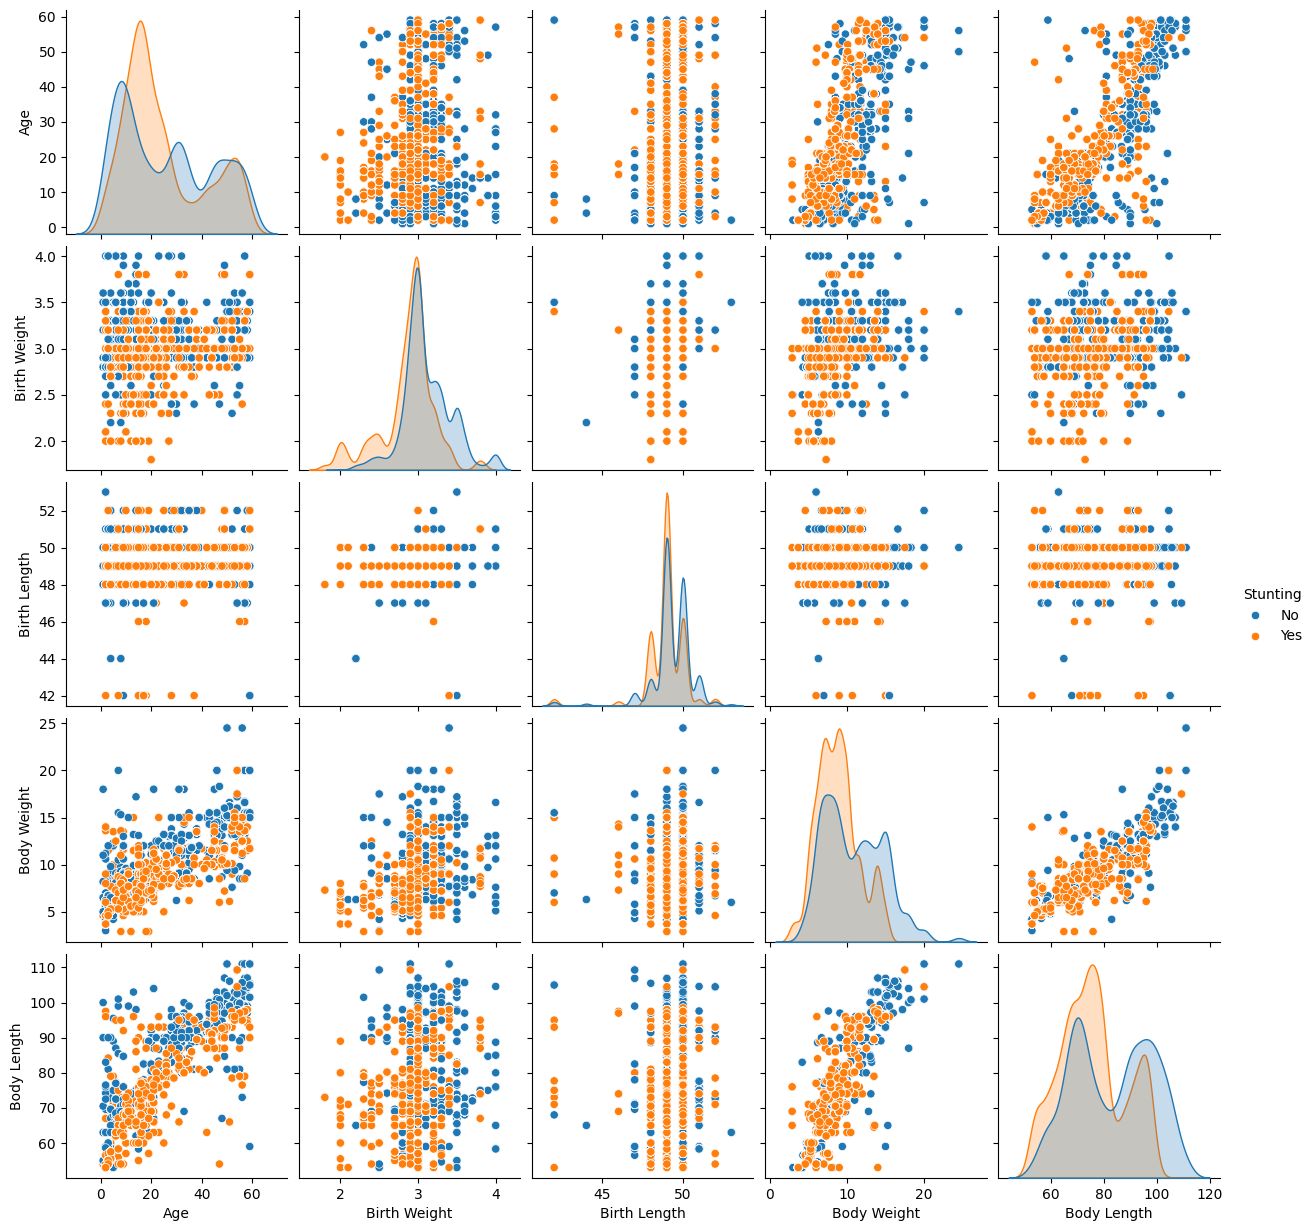

In [146]:
# Visualisasikan data
sns.pairplot(data, hue="Stunting")

In [147]:
# Periksa nilai unik dan jumlahnya
print(data['Stunting'].unique())
print(data['Stunting'].value_counts())

['No' 'Yes']
Stunting
Yes    3312
No     3188
Name: count, dtype: int64


In [148]:
# Label Encoding
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['ASI Eksklusif'] = le.fit_transform(data['ASI Eksklusif'])
data['Stunting'] = le.fit_transform(data['Stunting'])

print(data.head(10))
data.info()

   Sex  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0    0   56           2.9            50         11.0         90.0   
1    0   20           3.3            49         11.1         80.5   
2    1    4           2.8            48          6.5         63.0   
3    0   14           2.0            49          7.0         71.0   
4    1   32           3.2            49         11.0         88.7   
5    1   30           2.3            50         12.0         90.0   
6    1    2           2.9            49          8.5         74.2   
7    1   33           2.5            49         10.0         91.5   
8    1   33           3.0            50         15.0         96.0   
9    0   15           4.0            51          5.9         58.3   

   ASI Eksklusif  Stunting  
0              1         0  
1              0         0  
2              0         0  
3              1         0  
4              1         0  
5              1         0  
6              1         0  
7       

In [149]:
# Definisikan fitur dan variabel target
x = data[['Sex', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length', 'ASI Eksklusif']]
y = data['Stunting']

In [150]:
# Skalakan fitur
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [151]:
# Simpan scaler ke dalam file
pickle.dump(scaler, open('scaler.sav', 'wb'))

In [152]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [153]:
# Latih classifier KNN
classifier = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

          No       0.96      0.99      0.97       820
         Yes       0.98      0.96      0.97       805

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

Confusion Matrix (KNN dengan dataset asli):
[[808  12]
 [ 31 774]]
Akurasi (KNN dengan dataset asli): 97.35%


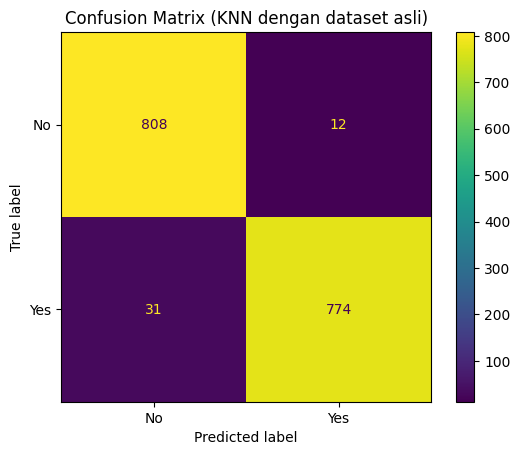

In [154]:
# Laporan klasifikasi dan confusion matrix
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Confusion Matrix (KNN dengan dataset asli):\n{cm}")
print(f"Akurasi (KNN dengan dataset asli): {accuracy:.2f}%")
ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes']).plot()
plt.title('Confusion Matrix (KNN dengan dataset asli)')
plt.show()

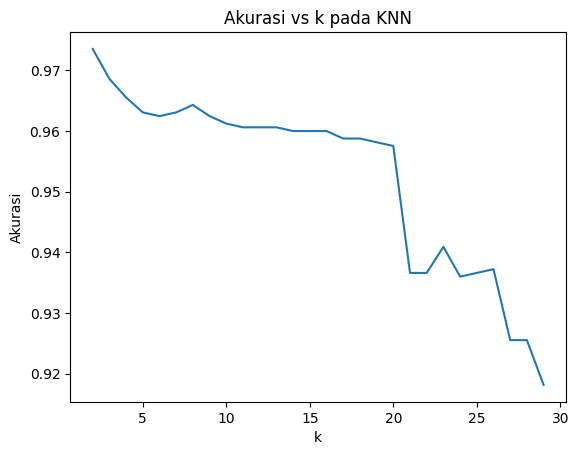

In [155]:
# Tuning hyperparameter untuk mencari nilai k terbaik
k_range = range(2, 30)
akurasi = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    akurasi.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, akurasi)
plt.xlabel('k')
plt.ylabel('Akurasi')
plt.title('Akurasi vs k pada KNN')
plt.show()

In [156]:
# Prediction on a new instance
new_instance = np.array([[1, 16, 2.4, 48, 6.6, 76, 1]])
new_instance_scaled = scaler.transform(new_instance)
pred_label = classifier.predict(new_instance_scaled)
predicted = 'Yes' if pred_label[0] == 1 else 'No'
print(predicted)

if predicted == "Yes":
    print('Anak ini mengalami Stunting')
else:
    print('Anak ini Tidak mengalami Stunting')

Yes
Anak ini mengalami Stunting


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [157]:
# Simpan model yang dilatih ke dalam file
filename = 'StuntingModel.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [158]:
# Muat model yang disimpan
loaded_model = pickle.load(open('StuntingModel.sav', 'rb'))

In [159]:
# Prediksi pada instance baru dengan model yang dimuat
new_instance = np.array([[1, 16, 2.4, 48, 6.6, 76, 1]])
new_instance_scaled = scaler.transform(new_instance)
pred_label = loaded_model.predict(new_instance_scaled)
predicted = 'Yes' if pred_label[0] == 1 else 'No'
print(predicted)

if predicted == "Yes":
    print('Anak ini mengalami Stunting')
else:
    print('Anak ini Tidak mengalami Stunting')

Yes
Anak ini mengalami Stunting


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [160]:
for column in x.columns:
  print(column)

Sex
Age
Birth Weight
Birth Length
Body Weight
Body Length
ASI Eksklusif
